# FitFirst Study

In [37]:
import numpy as np
import pandas as pd
import networkx as nx
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
from pyvis.network import Network
from coloring.fit_first import fit_first
from utils import generate_k_colorable_graph

### Specify parameters here

In [ ]:
N = 50    # Number of online k-colorable graphs to generate at each step

In [12]:
# k, n, avg_comp_ratio, N
study_results = []
vertex_range = range(100,3001,100)[::2]
# chromatic number
for k in [2,3,4]:
    # number of vertices
    for n in tqdm(vertex_range):
        ratios = []
        for _ in range(N):
            # Generate a k-colorable graph
            G, _ = generate_k_colorable_graph(k, n, 0.7)
            # Color the graph
            G_ = fit_first(G)
            # Number of unqiue colors used
            num_colors = len(set([G_.nodes[i]['group'] for i in G_.nodes]))
            # Ratio of colors used to chromatic number
            ratio = num_colors / k
            ratios.append(ratio)
        
        # Average ratio of colors used to chromatic number
        avg_ratio = np.mean(ratios)
        study_results.append((k, n, avg_ratio, N))

        if n % 1000 == 0:
            df = pd.DataFrame(study_results, columns=['k', 'n', 'avg_comp_ratio', 'N'])
            df.to_feather(f'../data/fit_first_study_2_checkpoint.feather')


100%|██████████| 8/8 [32:22<00:00, 242.81s/it]


In [13]:
df = pd.DataFrame(study_results, columns=['k', 'n', 'avg_comp_ratio', 'N'])
df.to_feather('../data/fit_first_study_2.feather')

In [15]:
# Load both dataframes
_df1 = pd.read_feather('../data/fit_first_study.feather')
_df2 = pd.read_feather('../data/fit_first_study_2.feather')
df = pd.concat([_df1, _df2], ignore_index=True)

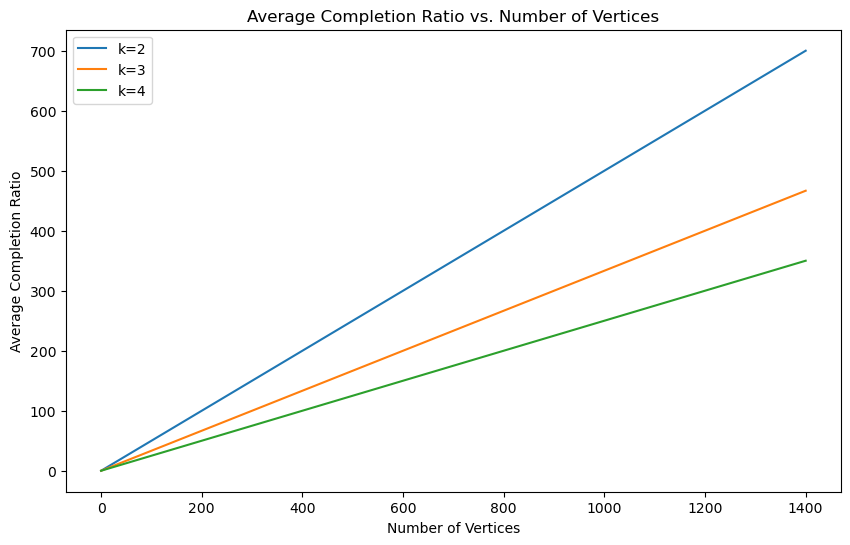

In [53]:
fig, ax = plt.subplots(figsize=(10,6))
for k in df.k.unique():
    x = df[df.k==k].groupby(['n']).mean()
    x['avg_comp_ratio'].plot(label=f'k={k}')
plt.title('Average Completion Ratio vs. Number of Vertices')
plt.xlabel('Number of Vertices')
plt.ylabel('Average Completion Ratio')
plt.legend()
plt.show()

In [67]:
# Divide by avg_comp_ratio by n
x = df.groupby(['k', 'n']).mean()
x['coefficient'] = x['avg_comp_ratio'] / x.index.get_level_values('n')

for k in x.index.get_level_values('k').unique():
    val = x.loc[k]['coefficient']
    print(f'k={k}: {val.mean():.3f} ± {val.std():.3f}')

k=2: 0.500 ± 0.000
k=3: 0.333 ± 0.000
k=4: 0.250 ± 0.000


In [68]:
x

avg_comp_ratio     N  coefficient
k n                                      
2 0           0.000000  50.0          NaN
  100        50.000000  50.0     0.500000
  200       100.000000  50.0     0.500000
  300       150.000000  50.0     0.500000
  400       200.000000  50.0     0.500000
  500       250.000000  50.0     0.500000
  600       300.000000  50.0     0.500000
  700       350.000000  50.0     0.500000
  800       400.000000  50.0     0.500000
  900       450.000000  50.0     0.500000
  1000      500.000000  50.0     0.500000
  1100      550.000000  50.0     0.500000
  1200      600.000000  50.0     0.500000
  1300      650.000000  50.0     0.500000
  1400      700.000000  50.0     0.500000
3 0           0.000000  50.0          NaN
  100        33.333333  50.0     0.333333
  200        66.666667  50.0     0.333333
  300       100.000000  50.0     0.333333
  400       133.333333  50.0     0.333333
  500       166.666667  50.0     0.333333
  600       200.000000  50.0     0.333333
  700       233.333333  50.0     0.333333
  800       266.666667  50.0     0.333333
  900       300.000000  50.0     0.333333
  1000      333.333333  50.0     0.333333
  1100      366.666667  50.0     0.333333
  1200      400.000000  50.0     0.333333
  1300      433.333333  50.0     0.333333
  1400      466.666667  50.0     0.333333
4 0           0.000000  50.0          NaN
  100        25.000000  50.0     0.250000
  200        50.000000  50.0     0.250000
  300        75.000000  50.0     0.250000
  400       100.000000  50.0     0.250000
  500       125.000000  50.0     0.250000
  600       150.000000  50.0     0.250000
  700       175.000000  50.0     0.250000
  800       200.000000  50.0     0.250000
  900       225.000000  50.0     0.250000
  1000      250.000000  50.0     0.250000
  1100      275.000000  50.0     0.250000
  1200      300.000000  50.0     0.250000
  1300      325.000000  50.0     0.250000
  1400      350.000000  50.0     0.250000

In [71]:
df

,k,n,avg_comp_ratio,N
0,2,100,50.000000,50
1,2,300,150.000000,50
2,2,500,250.000000,50
3,2,700,350.000000,50
4,2,900,450.000000,50
5,2,1100,550.000000,50
6,2,1300,650.000000,50
7,3,100,33.333333,50
8,3,300,100.000000,50
9,3,500,166.666667,50
